
 Exercise 1 (Petal Features) — k값별 정확도:
k = 1 → 정확도: 0.98
k = 2 → 정확도: 0.98
k = 3 → 정확도: 0.96
k = 4 → 정확도: 0.96
k = 5 → 정확도: 0.96
k = 6 → 정확도: 0.96
k = 7 → 정확도: 0.96
k = 8 → 정확도: 0.96
k = 9 → 정확도: 0.96
k = 10 → 정확도: 0.96

✅ 최적의 k값은: 1 (정확도: 0.98)
Sample 131 → Predicted: 2, Actual: 2
Sample 132 → Predicted: 2, Actual: 2

 Exercise 2 (Sepal Features) — k값별 정확도:
k = 1 → 정확도: 0.71
k = 2 → 정확도: 0.78
k = 3 → 정확도: 0.73
k = 4 → 정확도: 0.76
k = 5 → 정확도: 0.76
k = 6 → 정확도: 0.78
k = 7 → 정확도: 0.80
k = 8 → 정확도: 0.80
k = 9 → 정확도: 0.80
k = 10 → 정확도: 0.80

✅ 최적의 k값은: 7 (정확도: 0.80)


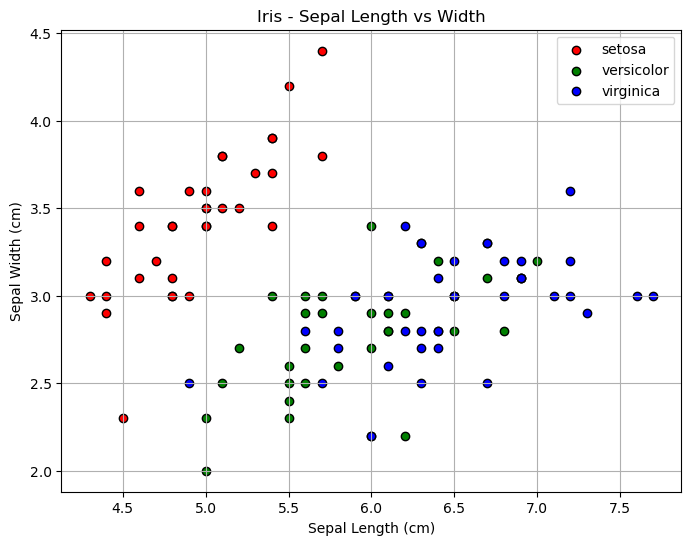

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X_full = iris.data
y_full = iris.target

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(x, X_train, y_train, k):
    distances = [euclidean_distance(x, xi) for xi in X_train]
    nearest = np.argsort(distances)[:k]
    votes = y_train[nearest]
    return np.bincount(votes).argmax()

def run_knn(X, y, feature_names, title_label):
    # Shuffle and split
    np.random.seed(0)
    indices = np.random.permutation(len(X))
    X = X[indices]
    y = y[indices]
    
    split = int(0.7 * len(X))
    X_train, X_val = X[:split], X[split:]
    y_train, y_val = y[:split], y[split:]

    print(f"\n {title_label} — k값별 정확도:")
    best_k = 1
    best_acc = 0

    for k in range(1, 11):
        correct = 0
        for xi, yi in zip(X_val, y_val):
            pred = knn_predict(xi, X_train, y_train, k)
            if pred == yi:
                correct += 1
        acc = correct / len(X_val)
        print(f"k = {k} → 정확도: {acc:.2f}")
        if acc > best_acc:
            best_acc = acc
            best_k = k

    print(f"\n✅ 최적의 k값은: {best_k} (정확도: {best_acc:.2f})")

    return X_train, y_train, best_k

# Exercise 1 — Petal Features

X_petal = iris.data[:, [2, 3]]  # Petal length, width
y = iris.target
X_train, y_train, best_k = run_knn(X_petal, y, ['Petal Length', 'Petal Width'], "Exercise 1 (Petal Features)")


# Pick sample 131 and 132
sample1 = X_full[130, [2, 3]]
sample2 = X_full[131, [2, 3]]

pred1 = knn_predict(sample1, X_train, y_train, best_k)
pred2 = knn_predict(sample2, X_train, y_train, best_k)

print(f"Sample 131 → Predicted: {pred1}, Actual: {y_full[130]}")
print(f"Sample 132 → Predicted: {pred2}, Actual: {y_full[131]}")


# Exercise 2 (Sepal Features)

X_sepal = iris.data[:150, [0, 1]]  # Sepal length, width
y_sepal = iris.target[:150]

X_train2, y_train2, best_k2 = run_knn(X_sepal, y_sepal, ['Sepal Length', 'Sepal Width'], "Exercise 2 (Sepal Features)")

# Final scatter plot 
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = iris.target_names

for i in range(3):
    plt.scatter(X_train2[y_train2 == i, 0], X_train2[y_train2 == i, 1],
                c=colors[i], label=labels[i], edgecolor='k')

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris - Sepal Length vs Width")
plt.legend()
plt.grid(True)
plt.show()